참조

[13장 참조..](https://djajafer.medium.com/using-tensorflow-2-data-api-to-load-and-pre-processing-data-6c83ec33da53)

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

#13.1 데이터 API

from_tensor_slices()

- 텐서를 받아 X의 각 원소가 아이템으로 표현되는 tf.data.Dataset을 만든다..

In [2]:
X = tf.range(10)        #샘플 데이터 텐서

#X의 각 원소가 item이 되는 dataset 생성..
dataset = tf.data.Dataset.from_tensor_slices(X)
dataset

<TensorSliceDataset shapes: (), types: tf.int32>

In [3]:
for item in dataset:
    print(item)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


##13.1.1 연쇄 변환

**Dataset 메서드는 새로운 데이터 셋을 만들어낸다..**

-> **따로 저장 필수**

- 0~9까지의 dataset을 3번 반복..(총 30개)
- batch(7)로 끊어서 변환..
- 즉, 30 / 7 = 4 ... 2


In [4]:
dataset = dataset.repeat(3).batch(7)
for item in dataset:
    print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int32)
tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int32)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int32)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int32)
tf.Tensor([8 9], shape=(2,), dtype=int32)


map()메서드를 이용해서 각 아이템을 변환함

In [5]:
#각 아이템을 두배함..

dataset = dataset.map(lambda x: x*2)

In [6]:
for item in dataset:
    print(item)

tf.Tensor([ 0  2  4  6  8 10 12], shape=(7,), dtype=int32)
tf.Tensor([14 16 18  0  2  4  6], shape=(7,), dtype=int32)
tf.Tensor([ 8 10 12 14 16 18  0], shape=(7,), dtype=int32)
tf.Tensor([ 2  4  6  8 10 12 14], shape=(7,), dtype=int32)
tf.Tensor([16 18], shape=(2,), dtype=int32)


apply()메서드를 이용해서 데이터셋 전체를 변환함..

In [7]:
#7개씩 묶었던것을 다시 풀어주는 unbatch()

dataset = dataset.unbatch()

In [8]:
for item in dataset:
    print(item)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(14, shape=(), dtype=int32)
tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(18, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(14, shape=(), dtype=int32)
tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(18, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(14, sh

filter() 메서드로 필터링한다..

In [9]:
#10보다 작은 것만 살아남는다..

dataset = dataset.filter(lambda x:x<10)

In [10]:
#길이찾는 메서드가 없을까??

for item in dataset:
    print(item)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)


take()메서드를 이용해서 몇 개의 아이템만 확인..

In [11]:
for item in dataset.take(3):
    print(item)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)


##13.1.2 데이터 셔플링

shuffle()메서드

- buffer_size만큼의 원본 데이터셋의 처음 아이템을 버퍼에 채운다
- 새로운 아이템이 요청되면 버퍼에서 랜덤하게 하나를 꺼내 반환하고, 원본에서 새로운 아이템을 추출하여 비워진 버퍼를 채운다
- 원본의 모든 아이템이 사용될 때까지 반복

**완벽한 셔플링을 위해서는 버퍼의 크기가 데이터셋의 크기와 같아야한다**

In [12]:
tf.random.set_seed(42)

dataset = tf.data.Dataset.range(10).repeat(3)       #0~9 세 번 반복
dataset = dataset.shuffle(buffer_size=3, seed=42).batch(7)
for item in dataset:
    print(item)

tf.Tensor([1 3 0 4 2 5 6], shape=(7,), dtype=int64)
tf.Tensor([8 7 1 0 3 2 5], shape=(7,), dtype=int64)
tf.Tensor([4 6 9 8 9 7 0], shape=(7,), dtype=int64)
tf.Tensor([3 1 4 5 2 8 7], shape=(7,), dtype=int64)
tf.Tensor([6 9], shape=(2,), dtype=int64)


메모리 용량보다 큰 대규모 데이터셋은 간단한 셔플링 버퍼 방식으로는 안된다..

-> **원본 데이터 자체를 섞어야 한다!** + 일반적으로 에포크마다 한번 더 섞음

###여러 파일에서 한 줄씩 번갈아 읽기

####캘리포니아 주택 데이터셋을 여러 개의 CSV로 나누기

훈련 검증 테스트로 나누고 스케일 조정

In [13]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1,1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

#훈련세트의 평균과 표준편차만 구해놓음..
scaler = StandardScaler()
scaler.fit(X_train)
X_mean = scaler.mean_
X_std = scaler.scale_

In [14]:
X_train.shape, X_valid.shape, X_test.shape

((11610, 8), (3870, 8), (5160, 8))

np.array_split(x, n)
- x배열을 n개로 자른다.. 마지막을 나머지때문에 갯수 다를 수도..
- ex) np.array_split([1,2,3,4,5], 2) => [1,2,3], [4,5]

In [15]:
def save_to_multiple_csv_files(data, name_prefix, header=None, n_parts=10):
    #dataset.housing이라는 디렉토리를 생성..
    housing_dir = os.path.join("datasets", "housing")
    os.makedirs(housing_dir, exist_ok=True)
    #파일이름을 대충 만들어만 놓은것.. {}안에 실제 이름이 들어갈 것임..
    path_format = os.path.join(housing_dir, "my_{}_{:02d}.csv")

    filepaths = []
    m = len(data)
    #데이터를 10개로 나눠서 저장하고 싶다..
    for file_idx, row_indices in enumerate(np.array_split(np.arange(m), n_parts)):
        #path_format에 name_prefix, file_idx사용해서 파일이름 결정..
        part_csv = path_format.format(name_prefix, file_idx)
        #filepath에 추가..
        filepaths.append(part_csv)

        #쓰기모드로 파일을 열어서
        with open(part_csv, "wt", encoding="utf-8") as f:
            #헤더가 있으면 헤더쓰고 한줄띄고
            if header is not None:
                f.write(header)
                f.write("\n")
            for row_idx in row_indices:
                #줄에있는 데이터를 ,을 중심으로 합치고 한줄 띄운다
                f.write(",".join([repr(col) for col in data[row_idx]]))
                f.write("\n")
    return filepaths

In [16]:
#같이 저장하려고 np.c_메서드 사용했다..
train_data = np.c_[X_train, y_train]
valid_data = np.c_[X_valid, y_valid]
test_data = np.c_[X_test, y_test]
header_cols = housing.feature_names + ["MedianHouseValue"]
#헤더를 각 특성의 이름과 중간주택가격을 ,으로 합친거로 지정..
header = ",".join(header_cols)

#훈련세트(11000개가량..)를 20개로 나눠서 저장
train_filepaths = save_to_multiple_csv_files(train_data, "train", header, n_parts=20)
#검증, 테스트세트는 10개로 나눠서 저장했다..
valid_filepaths = save_to_multiple_csv_files(valid_data, "valid", header, n_parts=10)
test_filepaths = save_to_multiple_csv_files(test_data, "test", header, n_parts=10)

In [17]:
pd.read_csv(train_filepaths[0]).head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
0,3.5214,15.0,3.049945,1.106548,1447.0,1.605993,37.63,-122.43,1.442
1,5.3275,5.0,6.490060,0.991054,3464.0,3.443340,33.69,-117.39,1.687
2,3.1000,29.0,7.542373,1.591525,1328.0,2.250847,38.44,-122.98,1.621
3,7.1736,12.0,6.289003,0.997442,1054.0,2.695652,33.55,-117.70,2.621
4,2.0549,13.0,5.312457,1.085092,3297.0,2.244384,33.93,-116.93,0.956


In [18]:
#텍스트 파일로 읽기..

with open(train_filepaths[0]) as f:
    for i in range(5):
        print(f.readline(), end="")

MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
3.5214,15.0,3.0499445061043287,1.106548279689234,1447.0,1.6059933407325193,37.63,-122.43,1.442
5.3275,5.0,6.490059642147117,0.9910536779324056,3464.0,3.4433399602385686,33.69,-117.39,1.687
3.1,29.0,7.5423728813559325,1.5915254237288134,1328.0,2.2508474576271187,38.44,-122.98,1.621
7.1736,12.0,6.289002557544757,0.9974424552429667,1054.0,2.6956521739130435,33.55,-117.7,2.621


In [19]:
#20개로 나눴으니까 인덱스 19까지..
train_filepaths

['datasets/housing/my_train_00.csv',
 'datasets/housing/my_train_01.csv',
 'datasets/housing/my_train_02.csv',
 'datasets/housing/my_train_03.csv',
 'datasets/housing/my_train_04.csv',
 'datasets/housing/my_train_05.csv',
 'datasets/housing/my_train_06.csv',
 'datasets/housing/my_train_07.csv',
 'datasets/housing/my_train_08.csv',
 'datasets/housing/my_train_09.csv',
 'datasets/housing/my_train_10.csv',
 'datasets/housing/my_train_11.csv',
 'datasets/housing/my_train_12.csv',
 'datasets/housing/my_train_13.csv',
 'datasets/housing/my_train_14.csv',
 'datasets/housing/my_train_15.csv',
 'datasets/housing/my_train_16.csv',
 'datasets/housing/my_train_17.csv',
 'datasets/housing/my_train_18.csv',
 'datasets/housing/my_train_19.csv']

기본적으로 list_files()는 파일 경로를 섞은 데이터셋을 반환..

interleave()메서드로 한 번에 다섯 개의 파일을 한 줄씩 번갈아 읽는다...

In [20]:
filepath_dataset = tf.data.Dataset.list_files(train_filepaths, seed=42)

In [21]:
#섞어서 가져온거 확인..
for filepath in filepath_dataset:
    print(filepath)

tf.Tensor(b'datasets/housing/my_train_15.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_08.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_03.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_01.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_10.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_05.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_19.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_16.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_02.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_09.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_00.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_07.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_12.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_04.csv', shape=(), dtype=string)
tf.Ten

총 **7개의 데이터 셋**이 존재

- 파일경로 데이터셋
- 인터리브 데이터셋
- 인터리브 데이터셋에 의해 내부적으로 생성된 다섯 개의 TextLineDataset..

-> 모든 데이터셋의 아이템이 소진될 때까지 한번에 한줄씩..

-> 그 후에 filepath_dataset에서 다음 n_readers개의 파일 경로를 가져오고 동일한 방식으로 한줄씩..

In [22]:
n_readers = 5

#한번에 다섯개의 파일을 한 줄씩 번갈아 읽는다
#첫 줄은 열이름이니까 skip()으로 건너뛴다
dataset = filepath_dataset.interleave(
    lambda filepath: tf.data.TextLineDataset(filepath).skip(1),
    cycle_length=n_readers)

In [23]:
sum = 0
for item in dataset:
    sum += 1
    print(item)
print(sum)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
tf.Tensor(b'3.4703,5.0,5.649149922720247,1.0757341576506956,2316.0,3.579598145285935,37.61,-121.01,1.293', shape=(), dtype=string)
tf.Tensor(b'1.6452,32.0,4.324705882352941,1.0376470588235294,1628.0,3.8305882352941176,36.06,-119.14,0.415', shape=(), dtype=string)
tf.Tensor(b'1.2969,44.0,4.398255813953488,1.072674418604651,1088.0,3.1627906976744184,33.95,-118.26,0.944', shape=(), dtype=string)
tf.Tensor(b'2.7483,28.0,4.106508875739645,1.111439842209073,2934.0,2.893491124260355,34.09,-118.14,2.188', shape=(), dtype=string)
tf.Tensor(b'3.9803,35.0,5.201923076923077,1.060897435897436,1462.0,4.685897435897436,34.03,-117.96,1.526', shape=(), dtype=string)
tf.Tensor(b'10.4399,23.0,8.31067125645439,1.0232358003442341,3585.0,3.085197934595525,34.14,-118.56,5.00001', shape=(), dtype=string)
tf.Tensor(b'2.6181,15.0,5.951672862453532,1.2007434944237918,661.0,2.45724907063197,39.05,-122.78,1.089', shape=(), dtype=string)
tf.Tensor(b'1.3929,33.0,3.657458563535912,

In [24]:
#5개만 보자..
for line in dataset.take(5):
    print(line.numpy())

b'4.1812,52.0,5.701388888888889,0.9965277777777778,692.0,2.4027777777777777,33.73,-118.31,3.215'
b'1.6571,34.0,4.454976303317536,1.0876777251184835,1358.0,3.2180094786729856,37.94,-122.35,1.052'
b'3.8456,35.0,5.461346633416459,0.9576059850374065,1154.0,2.8778054862842892,37.96,-122.05,1.598'
b'5.9522,26.0,6.196521739130435,1.0069565217391305,1479.0,2.5721739130434784,34.5,-119.75,4.384'
b'3.226,52.0,5.372469635627531,0.9473684210526315,1157.0,2.3421052631578947,37.96,-121.31,1.076'


##13.1.3 데이터 전처리

- 평균과 표준편차를 미리 계산했다고 가정..(앞에서 scaler로 계산 완료)

- 한 줄씩 받아서 파싱함
    - tf.io.decode_csv(line, recored_defaults)사용 시 파싱할 줄과 기본값을 지정해주어야함
    - 기본값이 누락된 열에서 결측치가 나오면 예외발생..

In [25]:
n_inputs = 8

def preprocess(line):
    #기본값 지정.. (특성 8개에는 기본값 0을 주고, 타깃값에는 형태만 알려주고 기본값은 없다..)
    #기본값이 없는 곳에서 결측치가 나오면 예외..
    defs = [0.] * n_inputs + [tf.constant([], dtype=tf.float32)]

    #파싱할 라인, 기본값 전달.. -> stack()함수를 사용해서 자동으로 파싱..
    fields = tf.io.decode_csv(line, record_defaults=defs)

    #마지막거 빼고는 특성..
    x = tf.stack(fields[:-1])
    #마지막거는 타깃..
    y = tf.stack(fields[-1:])

    #정규화해서 반환
    return (x-X_mean) / X_std, y

In [26]:
#앞의 8개는 특성, 마지막 1개는 타깃..
#따로 반환..

preprocess(b'4.2083,44.0,5.3232,0.9171,846.0,2.3370,37.47,-122.2,2.782')

(<tf.Tensor: shape=(8,), dtype=float32, numpy=
 array([ 0.16579159,  1.216324  , -0.05204564, -0.39215982, -0.5277444 ,
        -0.2633488 ,  0.8543046 , -1.3072058 ], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([2.782], dtype=float32)>)

##13.1.4 데이터 적재와 전처리를 합치기

단순 합침..

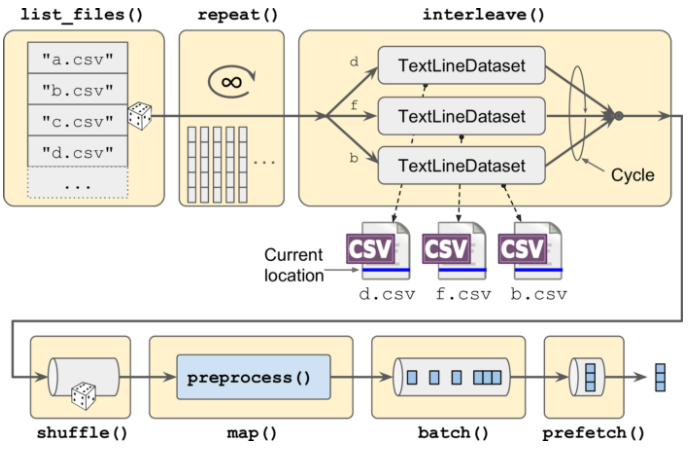

In [27]:
def csv_reader_dataset(filepaths, repeat=1, n_readers=5,
                       n_read_threads=None, shuffle_buffer_size=10000,
                       n_parse_threads=5, batch_size=32):
    #아까한 filepath_dataset생성..
    dataset = tf.data.Dataset.list_files(filepaths).repeat(repeat)
    #interleave()메서드를 이용한 interleave_dataset생성..
    dataset = dataset.interleave(
        lambda filepath: tf.data.TextLineDataset(filepath).skip(1),
        cycle_length=n_readers, num_parallel_calls=n_read_threads)
    #셔플링..
    dataset = dataset.shuffle(shuffle_buffer_size)
    #병렬 처리를 원하면 num_parallel_calls 매개변수 지정..
    dataset = dataset.map(preprocess, num_parallel_calls=n_parse_threads)
    #batch_size만큼씩 합침..
    dataset = dataset.batch(batch_size)

    #프리페치로 성능향상을 조짐..
    return dataset.prefetch(1)

##13.1.5 프리페치

**prefetch(1)**

- 훈련 알고리즘이 한 배치로 작업을 하는 동안 이 데이터셋이 동시에 다음 배치를 준비함
- 성능을 크게 향상시킨다
- 거의 GPU를 100% 활용가능하고, 결국 훈련속도가 더 빨라진다

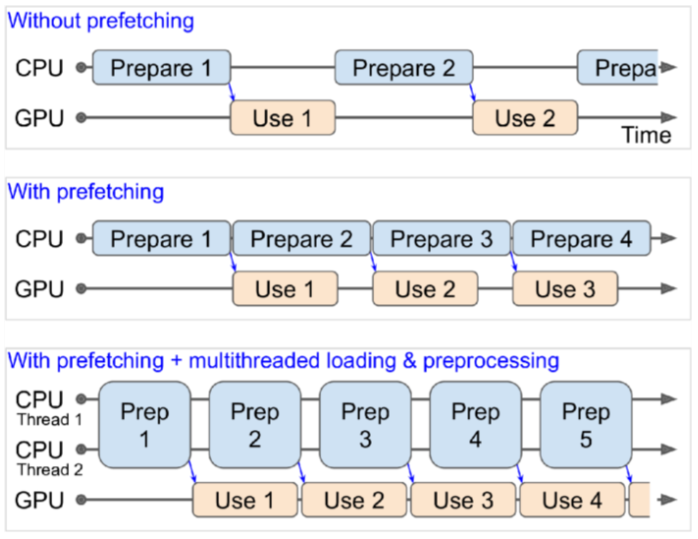

In [28]:
tf.random.set_seed(42)

#배치사이즈가 3개니까 train_set의 원소안에 3개씩 묶여서 item들이 있다..
train_set = csv_reader_dataset(train_filepaths, batch_size=3)

#거기서 두개 가져오는거니까 총 6개의 데이터가 출력되는 것..
for X_batch, y_batch in train_set.take(2):
    print("X =", X_batch)
    print("y =", y_batch)
    print()

X = tf.Tensor(
[[ 0.5804519  -0.20762321  0.05616303 -0.15191229  0.01343246  0.00604472
   1.2525111  -1.3671792 ]
 [ 5.818099    1.8491895   1.1784915   0.28173092 -1.2496178  -0.3571987
   0.7231292  -1.0023477 ]
 [-0.9253566   0.5834586  -0.7807257  -0.28213993 -0.36530012  0.27389365
  -0.76194876  0.72684526]], shape=(3, 8), dtype=float32)
y = tf.Tensor(
[[1.752]
 [1.313]
 [1.535]], shape=(3, 1), dtype=float32)

X = tf.Tensor(
[[-0.8324941   0.6625668  -0.20741376 -0.18699841 -0.14536144  0.09635526
   0.9807942  -0.67250353]
 [-0.62183803  0.5834586  -0.19862501 -0.3500319  -1.1437552  -0.3363751
   1.107282   -0.8674123 ]
 [ 0.8683102   0.02970133  0.3427381  -0.29872298  0.7124906   0.28026953
  -0.72915536  0.86178064]], shape=(3, 8), dtype=float32)
y = tf.Tensor(
[[0.919]
 [1.028]
 [2.182]], shape=(3, 1), dtype=float32)



##13.1.6 tf.keras와 데이터셋 사용하기

In [29]:
#앞이랑 똑같이 가져오는데, 32개씩 묶여서 가져온다..(batch_size기본값 32)

train_set = csv_reader_dataset(train_filepaths, repeat=None)
valid_set = csv_reader_dataset(valid_filepaths)
test_set = csv_reader_dataset(test_filepaths)

In [30]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

#모델 생성.. 밀집층 2개
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1),
])

In [31]:
#컴파일..

model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [32]:
batch_size = 32
model.fit(train_set, steps_per_epoch=len(X_train) // batch_size, epochs=10,
          validation_data=valid_set)

Epoch 1/10
362/362 [==============================] - 2s 3ms/step - loss: 1.4679 - val_loss: 21.5124
Epoch 2/10
362/362 [==============================] - 1s 3ms/step - loss: 0.8735 - val_loss: 0.6648
Epoch 3/10
362/362 [==============================] - 1s 2ms/step - loss: 0.6317 - val_loss: 0.6196
Epoch 4/10
362/362 [==============================] - 1s 3ms/step - loss: 0.5933 - val_loss: 0.5669
Epoch 5/10
362/362 [==============================] - 1s 3ms/step - loss: 0.5629 - val_loss: 0.5402
Epoch 6/10
362/362 [==============================] - 1s 2ms/step - loss: 0.5693 - val_loss: 0.5209
Epoch 7/10
362/362 [==============================] - 1s 2ms/step - loss: 0.5231 - val_loss: 0.6130
Epoch 8/10
362/362 [==============================] - 1s 2ms/step - loss: 0.5074 - val_loss: 0.4818
Epoch 9/10
362/362 [==============================] - 1s 3ms/step - loss: 0.4963 - val_loss: 0.4904
Epoch 10/10
362/362 [==============================] - 1s 2ms/step - loss: 0.5023 - val_loss: 0.458

비슷하게 evaluate()와 predict()메서드에 데이터셋을 전달할 수 있다

In [33]:
model.evaluate(test_set)

162/162 [==============================] - 0s 2ms/step - loss: 0.4785


0.47854188084602356

In [34]:
#테스트세트에서 3개를 꺼내서 lambda 함수를 이용해서 특성만 가져옴..
new_set = test_set.take(3).map(lambda X, y : X)
prediction = model.predict(new_set)

In [35]:
#왜 96개지? (32 * 3 = 96)이니까 당연!!

len(prediction)

96

전체 훈련 반복을 수행하는 텐서플로 함수도 만들수 있다..

In [36]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [37]:
optimizer = keras.optimizers.Nadam(learning_rate=0.01)
loss_fn = keras.losses.mean_squared_error

@tf.function
def train(model, n_epochs, batch_size=32,
          n_readers=5, n_read_threads=5, shuffle_buffer_size=10000, n_parse_threads=5):
    #훈련세트 32개씩 묶어서 불러오고
    train_set = csv_reader_dataset(train_filepaths, repeat=n_epochs, n_readers=n_readers,
                       n_read_threads=n_read_threads, shuffle_buffer_size=shuffle_buffer_size,
                       n_parse_threads=n_parse_threads, batch_size=batch_size)
    #특성과 타겟에 대해
    for X_batch, y_batch in train_set:
        #그레이디언트 계산한다..
        with tf.GradientTape() as tape:
            y_pred = model(X_batch)     #예측..
            main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))    #현재 손실..
            loss = tf.add_n([main_loss] + model.losses)             #총 손실..
        gradients = tape.gradient(loss, model.trainable_variables)      #그레이디언트 업데이트..?
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))    #얘도 업데이트..?

train(model, 5)

그냥 다른 모델..

In [38]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [39]:
optimizer = keras.optimizers.Nadam(learning_rate=0.01)
loss_fn = keras.losses.mean_squared_error

@tf.function
def train(model, n_epochs, batch_size=32,
          n_readers=5, n_read_threads=5, shuffle_buffer_size=10000, n_parse_threads=5):
    train_set = csv_reader_dataset(train_filepaths, repeat=n_epochs, n_readers=n_readers,
                       n_read_threads=n_read_threads, shuffle_buffer_size=shuffle_buffer_size,
                       n_parse_threads=n_parse_threads, batch_size=batch_size)
    n_steps_per_epoch = len(X_train) // batch_size
    total_steps = n_epochs * n_steps_per_epoch
    global_step = 0
    for X_batch, y_batch in train_set.take(total_steps):
        global_step += 1
        if tf.equal(global_step % 100, 0):
            tf.print("\rGlobal step", global_step, "/", total_steps)
        with tf.GradientTape() as tape:
            y_pred = model(X_batch)
            main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
            loss = tf.add_n([main_loss] + model.losses)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

train(model, 5)

Global step 100 / 1810
Global step 200 / 1810
Global step 300 / 1810
Global step 400 / 1810
Global step 500 / 1810
Global step 600 / 1810
Global step 700 / 1810
Global step 800 / 1810
Global step 900 / 1810
Global step 1000 / 1810
Global step 1100 / 1810
Global step 1200 / 1810
Global step 1300 / 1810
Global step 1400 / 1810
Global step 1500 / 1810
Global step 1600 / 1810
Global step 1700 / 1810
Global step 1800 / 1810


#13.2 TFRecord 포맷

- 각 레코드 길이
- 길이가 올바른지 체크하는 CRC 체크섬
- 실제 데이터
- 데이터를 위한 CRC 체크섬

In [40]:
with tf.io.TFRecordWriter("my_data.tfrecord") as f:
    f.write(b"This is the first record")
    f.write(b"And this is the second record")

tf.data.TFRecordDataset 사용해 읽을 수 있다..

In [41]:
filepaths = ["my_data.tfrecord"]
dataset = tf.data.TFRecordDataset(filepaths)
for item in dataset:
    print(item)

tf.Tensor(b'This is the first record', shape=(), dtype=string)
tf.Tensor(b'And this is the second record', shape=(), dtype=string)


##13.2.1 압축된 TFRecord 파일

- 압축할 필요가 있다..(특히 네트워크를 통해 읽어야 하는 경우)
- options 매개변수를 사용하여 압축된 TFRecord 파일을 만들 수 있다..

In [42]:
options = tf.io.TFRecordOptions(compression_type="GZIP")
with tf.io.TFRecordWriter("my_compressed.tfrecord", options) as f:
    f.write(b"This is the first record")
    f.write(b"And this is the second record")

In [43]:
dataset = tf.data.TFRecordDataset(["my_compressed.tfrecord"], compression_type="GZIP")

for item in dataset:
    print(item)

tf.Tensor(b'This is the first record', shape=(), dtype=string)
tf.Tensor(b'And this is the second record', shape=(), dtype=string)


##13.2.2 프로토콜 버퍼 개요

In [44]:
%%writefile person.proto
syntax = "proto3";
message Person {
    string name = 1;        #1,2,3은 필드 식별자..
    int32 id = 2;
    repeated string email = 3;
}

Writing person.proto


--python_out=./으로 하면 되고 --python_out=.으로 하면 안댄다..

In [45]:
!protoc person.proto --python_out=./ --descriptor_set_out=person.desc --include_imports

In [46]:
!ls person*

person.desc  person_pb2.py  person.proto


In [47]:
from person_pb2 import Person

person = Person(name="AI", id=123, email=["a@b.com"])   # Person 생성
print(person) # Person 출력

name: "AI"
id: 123
email: "a@b.com"



In [48]:
person.name     # 필드 읽기

'AI'

In [49]:
person.name = "Alice"       # 필드 수정

In [50]:
person.email[0]     # 반복필드는 배열처럼 참조할 수 있다

'a@b.com'

In [51]:
person.email.append("c@d.com")      # 이메일주소 추가

In [52]:
s = person.SerializeToString()      # 바이트 문자열로 객체를 직렬화

In [53]:
person2 = Person()      #새로운 Person 객체를 만든다

In [54]:
person2.ParseFromString(s)      #바이트 문자열을 파싱한다(27바이트 길이)

27

In [55]:
person == person2       #두 객체는 동일..

True

##13.2.3 텐서플로 프로토콜 버퍼

```
%%writefile 
syntax = "proto3";

message BytesList { repeated bytes value = 1; }
message FloatList { repeated float value = 1 [packed = true]; }
message Int64List { repeated int64 value = 1 [packed = true]; }
message Feature {
    oneof kind {
        BytesList bytes_list = 1;
        FloatList float_list = 2;
        Int64List int64_list = 3;
    }
};
message Features { map<string, Feature> feature = 1; };
message Example { Features features = 1; };
```

In [56]:
from tensorflow.train import BytesList, FloatList, Int64List
from tensorflow.train import Feature, Features, Example

person_example = Example(
    #feature 형태를 가진 특성 추가..
    features=Features(
        feature={
            "name": Feature(bytes_list=BytesList(value=[b"Alice"])),
            "id": Feature(int64_list=Int64List(value=[123])),
            "emails": Feature(bytes_list=BytesList(value=[b"a@b.com", b"c@d.com"]))
        }))

with tf.io.TFRecordWriter("my_contacts.tfrecord") as f:
    #직렬화해서 Example을 담은 TFRecord 파일을 만들었다
    f.write(person_example.SerializeToString())

##13.2.3 Example 프로토콜 버퍼를 읽고 파싱하기

- description 딕셔너리로 설명을 해줘야 파싱할 수 있다..

고정 길이 특성
- tf.io.FixedLenFeature를 이용해서 특성의 크기, 타입, 기본값 표현

가변 길이 특성
- tf.io.VarLenFeature를 이용해서 특성의 타입만 표현

In [57]:
feature_description = {
    "name" : tf.io.FixedLenFeature([], tf.string, default_value=""),        #특성의 크기, 타입, 기본값..
    "id" : tf.io.FixedLenFeature([], tf.int64, default_value=0),
    "emails" : tf.io.VarLenFeature(tf.string),      #특성의 타입만..
}

#직렬화된 Example 프로토콜 버퍼를 파싱함..
for serialized_example in tf.data.TFRecordDataset(["my_contacts.tfrecord"]):
    parsed_example = tf.io.parse_single_example(serialized_example, feature_description)

가변 길이 특성은 희소 텐서로 파싱됨..

- tf.sparse.to_dense()로 밀집텐서로 바꿀 수 있다..

In [58]:
#희소 텐서로 파싱됨..
parsed_example

{'emails': <tensorflow.python.framework.sparse_tensor.SparseTensor at 0x7fe95c4555d0>,
 'id': <tf.Tensor: shape=(), dtype=int64, numpy=123>,
 'name': <tf.Tensor: shape=(), dtype=string, numpy=b'Alice'>}

In [59]:
parsed_example["emails"].values[0]

<tf.Tensor: shape=(), dtype=string, numpy=b'a@b.com'>

밀집텐서로 바뀌면서 뭐가 달라졌는지는 잘.. 모르겟다..

In [60]:
# 밀집텐서로 바꿨다..
tf.sparse.to_dense(parsed_example["emails"], default_value=b"")

<tf.Tensor: shape=(2,), dtype=string, numpy=array([b'a@b.com', b'c@d.com'], dtype=object)>

In [61]:
parsed_example["emails"].values

<tf.Tensor: shape=(2,), dtype=string, numpy=array([b'a@b.com', b'c@d.com'], dtype=object)>

###BytesList는 어떠한 이진데이터도 넣을 수 있다!!

이미지

- tf.io.encode_jpeg()로 이미지를 인코딩
- 이진데이터를 BytesList에 넣음
- Example을 파싱한 다음 데이터를 파싱
- 원본 이미지를 얻기위해 tf.io.decode_jpeg()를 호출..

다른 이미지를 위한 tf.io.decode_image()사용 가능..

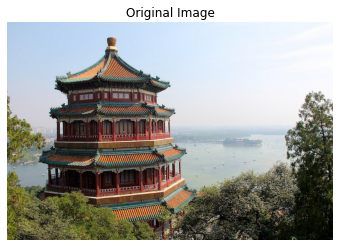

In [62]:
from sklearn.datasets import load_sample_images

img = load_sample_images()["images"][0]
plt.imshow(img)
plt.axis("off")
plt.title("Original Image")
plt.show()

TFRecord 파일을 만듦..

In [63]:
#이미지를 인코딩해서 BytesList에 올렸다..

data = tf.io.encode_jpeg(img)       #인코딩

#Example 객체 생성..
example_with_image = Example(features=Features(feature={
    "image": Feature(bytes_list=BytesList(value=[data.numpy()]))}))

#직렬화했다..
serialized_example = example_with_image.SerializeToString()

description을 줘서 파싱함..

In [64]:
feature_description = { "image": tf.io.VarLenFeature(tf.string) }

#parse_single_example를 이용해서 샘플 하나씩 파싱..
example_with_image = tf.io.parse_single_example(serialized_example, feature_description)
decoded_img = tf.io.decode_jpeg(example_with_image["image"].values[0])

In [65]:
#decode_image를 이용해서 디코드..

decoded_img = tf.io.decode_image(example_with_image["image"].values[0])

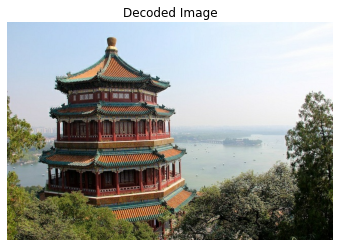

In [66]:
plt.imshow(decoded_img)
plt.title("Decoded Image")
plt.axis("off")
plt.show()

In [67]:
#parse_example를 이용해서 배치단위로 파싱할 수도..

dataset = tf.data.TFRecordDataset(["my_contacts.tfrecord"]).batch(10)
for serialized_examples in dataset:
    parsed_examples = tf.io.parse_example(serialized_examples,
                                          feature_description)

In [101]:
parsed_examples

{'image': <tensorflow.python.framework.sparse_tensor.SparseTensor at 0x7fe95cb220d0>}

##13.2.4 SequenceExample 프로토콜 버퍼를 사용해 리스트의 리스트 다루기

SequenceExample 프로토콜 버퍼의 정의

```proto
syntax = "proto3";

message FeatureList { repeated Feature feature = 1; };
message FeatureLists { map<string, FeatureList> feature_list = 1; };
message SequenceExample {
  Features context = 1;
  FeatureLists feature_lists = 2;
};
```

두 개의 FeatureList이름 "content", "comments"

In [69]:
from tensorflow.train import FeatureList, FeatureLists, SequenceExample

context = Features(feature={
    "author_id": Feature(int64_list=Int64List(value=[123])),
    "title": Feature(bytes_list=BytesList(value=[b"A", b"desert", b"place", b"."])),
    "pub_date": Feature(int64_list=Int64List(value=[1623, 12, 25]))
})

content = [["When", "shall", "we", "three", "meet", "again", "?"],
           ["In", "thunder", ",", "lightning", ",", "or", "in", "rain", "?"]]
comments = [["When", "the", "hurlyburly", "'s", "done", "."],
            ["When", "the", "battle", "'s", "lost", "and", "won", "."]]

#words를 받아서 특성마다 BytesList로 추가하는 함수..
def words_to_feature(words):
    return Feature(bytes_list=BytesList(value=[word.encode("utf-8")
                                               for word in words]))

#content, comments 안에 있는 단어들 전부다 추가했다..
#for문이 두번이니까 리스트의 리스트 원소까지 접근가능
content_features = [words_to_feature(sentence) for sentence in content]
comments_features = [words_to_feature(comment) for comment in comments]

#SequenceExample의 객체를 만든다..
sequence_example = SequenceExample(
    context=context,        #context에는 context
    feature_lists=FeatureLists(feature_list={       #feature_list에는 리스트의 리스트 추가..
        "content": FeatureList(feature=content_features),
        "comments": FeatureList(feature=comments_features)
    }))

In [70]:
sequence_example

context {
  feature {
    key: "author_id"
    value {
      int64_list {
        value: 123
      }
    }
  }
  feature {
    key: "pub_date"
    value {
      int64_list {
        value: 1623
        value: 12
        value: 25
      }
    }
  }
  feature {
    key: "title"
    value {
      bytes_list {
        value: "A"
        value: "desert"
        value: "place"
        value: "."
      }
    }
  }
}
feature_lists {
  feature_list {
    key: "comments"
    value {
      feature {
        bytes_list {
          value: "When"
          value: "the"
          value: "hurlyburly"
          value: "\'s"
          value: "done"
          value: "."
        }
      }
      feature {
        bytes_list {
          value: "When"
          value: "the"
          value: "battle"
          value: "\'s"
          value: "lost"
          value: "and"
          value: "won"
          value: "."
        }
      }
    }
  }
  feature_list {
    key: "content"
    value {
      feature {
      

In [71]:
#직렬화..

serialized_sequence_example = sequence_example.SerializeToString()

In [72]:
#context 안의 특성 설명..
context_feature_descriptions = {
    "author_id": tf.io.FixedLenFeature([], tf.int64, default_value=0),
    "title": tf.io.VarLenFeature(tf.string),
    "pub_date": tf.io.FixedLenFeature([3], tf.int64, default_value=[0, 0, 0]),
}
#sequence_feature안의 특성 설명..
sequence_feature_descriptions = {
    "content": tf.io.VarLenFeature(tf.string),
    "comments": tf.io.VarLenFeature(tf.string),
}

#SequenceExample 파싱을 위한 tf.io.parse_single_sequence_example()
#배치를 파싱하려면 tf.io.parse_sequence_example()
parsed_context, parsed_feature_lists = tf.io.parse_single_sequence_example(
    serialized_sequence_example, context_feature_descriptions,
    sequence_feature_descriptions)

In [73]:
#파싱 결과..

parsed_context

{'author_id': <tf.Tensor: shape=(), dtype=int64, numpy=123>,
 'pub_date': <tf.Tensor: shape=(3,), dtype=int64, numpy=array([1623,   12,   25])>,
 'title': <tensorflow.python.framework.sparse_tensor.SparseTensor at 0x7fe95b419950>}

In [74]:
parsed_context["title"].values

<tf.Tensor: shape=(4,), dtype=string, numpy=array([b'A', b'desert', b'place', b'.'], dtype=object)>

In [75]:
parsed_feature_lists

{'comments': <tensorflow.python.framework.sparse_tensor.SparseTensor at 0x7fe95b419a10>,
 'content': <tensorflow.python.framework.sparse_tensor.SparseTensor at 0x7fe95b419dd0>}

In [76]:
#content의 특성을 출력..

print(tf.RaggedTensor.from_sparse(parsed_feature_lists["content"]))

<tf.RaggedTensor [[b'When', b'shall', b'we', b'three', b'meet', b'again', b'?'], [b'In', b'thunder', b',', b'lightning', b',', b'or', b'in', b'rain', b'?']]>


#13.3 입력 특성 전처리

데이터 준비하려면 모든 특성을 수치 특성으로 변환하고 정규화 해야한다!

방법 1. 선호하는 도구(넘파이, 판다스, 사이킷런)를 사용해서 전처리

방법 2. 데이터 API로 적재할 때 동적으로 전처리

방법 3. **전처리 층을 모델에 직접 포함**

In [103]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

#모델 생성
means = np.mean(X_train, axis=0, keepdims=True)
stds = np.std(X_train, axis=0, keepdims=True)
eps = keras.backend.epsilon()
model = keras.models.Sequential([
        #Lambda()함수를 이용해서 표준화 구현
        keras.layers.Lambda(lambda inputs: (inputs - means) / (stds + eps)),
        keras.layers.Flatten(),
        keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
        keras.layers.Dense(1),
])

In [104]:
#사용자 정의층 구현..

class Standardization(keras.layers.Layer):
    def adapt(self, data_sample):
        self.means_ = np.mean(data_sample, axis=0, keepdims=True)
        self.stds_ = np.std(data_sample, axis=0, keepdims=True)
    def call(self, inputs):
        return (inputs - self.means_) / (self.stds_ + keras.backend.epsilon())

Standardization 층을 모델에 추가하지 전에 데이터 샘플과 함께 adapt() 메서드를 호출해야함

그래야 각 특성에 대해 적절한 평균과 표준편차를 사용할 수 있다

In [105]:
#data_sample 생성..
m = np.arange(len(X_train))
np.random.shuffle(m)

#랜덤으로 5000개..(원래 11600개 쯤..)
data_sample = X_train[m[:5000]]

In [106]:
std_layer = Standardization()
std_layer.adapt(data_sample)

In [107]:
#표준화 사용자 정의 층을 사용한 모델..

model = keras.Sequential()
model.add(std_layer)        #전처리층..
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(1))

In [108]:
#모델 컴파일..
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [111]:
model.fit(X_train, y_train, epochs = 10, validation_data=(X_valid, y_valid))

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4567 - val_loss: 0.4182
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4492 - val_loss: 0.4117
Epoch 3/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4428 - val_loss: 0.4049
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4369 - val_loss: 0.4004
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4323 - val_loss: 0.3952
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4277 - val_loss: 0.3911
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4239 - val_loss: 0.3876
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4203 - val_loss: 0.3845
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4172 - val_loss: 0.3816
Epoch 10/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4142 - val_loss: 0.3791

##13.3.1 원-핫 벡터를 사용해 범주형 특성 인코딩하기

- KeyValueTensorInitializer : 이미 모든 범주 데이터를 알고 있는 경우

- TextFileInitializer : 텍스트파일에 라인당 하나의 범주로 나열되어 있는 경우

- **oov 버킷**

    - 어휘 사전에 없는 범주를 찾았을 때 사용하는 인덱스..
    - 범주 갯수가 많거나 범주가 자주 바뀌면 다 찾는게 어려우니까 사용..
    - 좋은 방법 : 샘플 데이터를 기반으로 어휘 사전을 정의하고 샘플 데이터에 없는 다른 범주를 oov버킷에 추가..

In [83]:
#어휘 사전(나오는 모든 범주) 정의
vocab = ["<1H OCEAN", "INLAND", "NEAR OCEAN", "NEAR BAY", "ISLAND"]

#범주에 해당하는 인덱스의 텐서 생성..
indices = tf.range(len(vocab), dtype=tf.int64)

#초기화 객체 생성 (모든 범주를 아는 상황) 룩업테이블 매핑..
table_init = tf.lookup.KeyValueTensorInitializer(vocab, indices)

#어휘사전 이외의 범주를 찾았을 때 사용할 인덱스 갯수 지정..
num_oov_buckets = 2
table = tf.lookup.StaticVocabularyTable(table_init, num_oov_buckets)

In [84]:
#범주에 DESERT는 없었다..
categories = tf.constant(["NEAR BAY", "DESERT", "INLAND", "INLAND"])

#그래서 5로 지정되었다..
cat_indices = table.lookup(categories)
cat_indices

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([3, 5, 1, 1])>

In [85]:
#oov 버킷까지 포함해서 원핫 벡터를 만들면 아래와 같다..
#DESERT 추가..

cat_one_hot = tf.one_hot(cat_indices, depth=len(vocab) + num_oov_buckets)
cat_one_hot

<tf.Tensor: shape=(4, 7), dtype=float32, numpy=
array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.]], dtype=float32)>

##13.3.2 임베딩을 사용해 범주형 특성 인코딩하기

보통 범주가 10개 이하면 원-핫, 50개 이상이면 임베딩, 그 사이는 각자 확인..

**표현학습**

- 범주가 유용하게 표현되도록 임베딩이 훈련되는 경향

**동작 원리**

임베딩 : 범주를 표현하는 훈련 가능한 밀집 벡터

1. 임베딩 공간에 범주들이 랜덤벡터로 초기화 되어있음
    - 임베딩 공간의 차원도 정할 수 있음
2. 임베딩을 훈련하는 동안 경사하강법으로 비슷한 범주들은 더 가깝게 된다..

In [86]:
#임베딩 차원 지정..
embedding_dim = 2

#범주와 oov버킷이 행, 임베딩차원이 열..
embed_init = tf.random.uniform([len(vocab) + num_oov_buckets, embedding_dim])
embedding_matrix = tf.Variable(embed_init)

In [87]:
#랜덤 초기화된 상태..

embedding_matrix

<tf.Variable 'Variable:0' shape=(7, 2) dtype=float32, numpy=
array([[0.6645621 , 0.44100678],
       [0.3528825 , 0.46448255],
       [0.03366041, 0.68467236],
       [0.74011743, 0.8724445 ],
       [0.22632635, 0.22319686],
       [0.3103881 , 0.7223358 ],
       [0.13318717, 0.5480639 ]], dtype=float32)>

In [88]:
#같은 범주를 다시 매핑..

categories = tf.constant(["NEAR BAY", "DESERT", "INLAND", "INLAND"])
cat_indices = table.lookup(categories)
cat_indices

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([3, 5, 1, 1])>

주어진 임베딩행렬에서 범주에 해당하는 행을 찾아주는 tf.nn.embedding_lookup()

In [89]:
tf.nn.embedding_lookup(embedding_matrix, cat_indices)

<tf.Tensor: shape=(4, 2), dtype=float32, numpy=
array([[0.74011743, 0.8724445 ],
       [0.3103881 , 0.7223358 ],
       [0.3528825 , 0.46448255],
       [0.3528825 , 0.46448255]], dtype=float32)>

Keras에서 지원하는 keras.layers.Embedding층..

In [90]:
embedding = keras.layers.Embedding(input_dim=len(vocab) + num_oov_buckets,
                                   output_dim=embedding_dim)

In [91]:
#tf.nn.embedding_lookup()이랑 역할 똑같음..

embedding(cat_indices)

<tf.Tensor: shape=(4, 2), dtype=float32, numpy=
array([[ 0.04467482,  0.02493341],
       [-0.02383961,  0.01973433],
       [ 0.04309944, -0.0247813 ],
       [ 0.04309944, -0.0247813 ]], dtype=float32)>

In [92]:
#수치형 특성 입력..
regular_inputs = keras.layers.Input(shape=[8])      
#범주형 특성 입력..
categories = keras.layers.Input(shape=[], dtype=tf.string)

#카테고리 매핑..
cat_indices = keras.layers.Lambda(lambda cats: table.lookup(cats))(categories)

#범주형 특성 임베딩
#input_dim=6 -> oov_버킷 갯수지정 한거다..
cat_embed = keras.layers.Embedding(input_dim=6, output_dim=2)(cat_indices)

encoded_inputs = keras.layers.concatenate([regular_inputs, cat_embed])
outputs = keras.layers.Dense(1)(encoded_inputs)
model = keras.models.Model(inputs=[regular_inputs, categories], outputs=[outputs])

##13.3.3 케라스 전처리 층

###keras.layers.Discretization()

이 층은 미분 가능하지 않는데, 전처리 층은 훈련시 동결되므로 경사하강법에 영향을 받지 않아서 상관없다..

- 연속적인 데이터를 몇 개의 구간으로 나누고 각 구간은 원-핫 벡터로 인코딩한다
- 잃는 정보도 있지만 패턴을 감지하는 데는 도움이 될 수도 있다..

###keras.layers.TextVectorization()

- 단어 인덱스 대신 단어 카운트 벡터를 출력하게 할 수도 있다..
- 이렇게 하면 단어의 순서가 완전히 무시되는데, **BOW**라고 부른다
- 스케일링 시에 and와 같이 많이 나오는 단어의 중요도를 낮추는 방향으로 전처리되어야 한다..

#13.4 TF 변환

In [93]:
try:
    import tensorflow_transform as tft

    def preprocess(inputs):  # inputs is a batch of input features
        median_age = inputs["housing_median_age"]
        ocean_proximity = inputs["ocean_proximity"]
        standardized_age = tft.scale_to_z_score(median_age - tft.mean(median_age))
        ocean_proximity_id = tft.compute_and_apply_vocabulary(ocean_proximity)
        return {
            "standardized_median_age": standardized_age,
            "ocean_proximity_id": ocean_proximity_id
        }
except ImportError:
    print("TF Transform is not installed. Try running: pip3 install -U tensorflow-transform")

TF Transform is not installed. Try running: pip3 install -U tensorflow-transform


#13.5 텐서플로 데이터셋(TFDS) 프로젝트

In [94]:
import tensorflow_datasets as tfds

datasets = tfds.load(name="mnist")
mnist_train, mnist_test = datasets["train"], datasets["test"]

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]


Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [95]:
print(tfds.list_builders())

['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset', 'ai2_arc', 'ai2_arc_with_ir', 'amazon_us_reviews', 'anli', 'arc', 'bair_robot_pushing_small', 'bccd', 'beans', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'blimp', 'bool_q', 'c4', 'caltech101', 'caltech_birds2010', 'caltech_birds2011', 'cars196', 'cassava', 'cats_vs_dogs', 'celeb_a', 'celeb_a_hq', 'cfq', 'chexpert', 'cifar10', 'cifar100', 'cifar10_1', 'cifar10_corrupted', 'citrus_leaves', 'cityscapes', 'civil_comments', 'clevr', 'clic', 'clinc_oos', 'cmaterdb', 'cnn_dailymail', 'coco', 'coco_captions', 'coil100', 'colorectal_histology', 'colorectal_histology_large', 'common_voice', 'coqa', 'cos_e', 'cosmos_qa', 'covid19sum', 'crema_d', 'curated_breast_imaging_ddsm', 'cycle_gan', 'deep_weeds', 'definite_pronoun_resolution', 'dementiabank', 'diabetic_retinopathy_detection', 'div2k', 'dmlab', 'downsampled_imagenet', 'dsprites', 'dtd', 'duke_ultrasound', 'emnist', 'eraser_multi_r

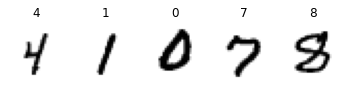

In [96]:
plt.figure(figsize=(6,3))
mnist_train = mnist_train.repeat(5).batch(32).prefetch(1)
for item in mnist_train:
    images = item["image"]
    labels = item["label"]
    for index in range(5):
        plt.subplot(1, 5, index + 1)
        image = images[index, ..., 0]
        label = labels[index].numpy()
        plt.imshow(image, cmap="binary")
        plt.title(label)
        plt.axis("off")
    break # just showing part of the first batch

In [97]:
datasets = tfds.load(name="mnist")
mnist_train, mnist_test = datasets["train"], datasets["test"]
mnist_train = mnist_train.repeat(5).batch(32)       #32개씩 묶었다..
mnist_train = mnist_train.map(lambda items: (items["image"], items["label"]))
mnist_train = mnist_train.prefetch(1)
for images, labels in mnist_train.take(1):
    print(images.shape)         #(32,28,28)까지는 items["image"]이고 끝에 (1)이 라벨..
    print(labels.numpy())

(32, 28, 28, 1)
[4 1 0 7 8 1 2 7 1 6 6 4 7 7 3 3 7 9 9 1 0 6 6 9 9 4 8 9 4 7 3 3]


In [98]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [99]:
datasets = tfds.load(name="mnist", batch_size=32, as_supervised=True)
mnist_train = datasets["train"].repeat().prefetch(1)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28, 1]),
    keras.layers.Lambda(lambda images: tf.cast(images, tf.float32)),
    keras.layers.Dense(10, activation="softmax")])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
model.fit(mnist_train, steps_per_epoch=60000 // 32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 32.1474 - accuracy: 0.8421
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 26.0519 - accuracy: 0.8688
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 24.9462 - accuracy: 0.8724
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 24.3747 - accuracy: 0.8754
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 23.9547 - accuracy: 0.8778


#13.6 연습문제